In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation

from sklearn import metrics

from itertools import cycle

%matplotlib inline

# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configurations, then run the four methods ($k$-means, mean shift, spectral clustering and affinity propagation) on each one.  Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups. 

## Functions

In [3]:
def make_new_blobs(centers):
# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
    X, y = make_blobs(
        n_samples=10000,
        centers=centers,
        cluster_std=1,
        n_features=2,
        random_state=99)

    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()
    
    #Divide into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9,
        random_state=99)

    return (X_train,X_test,y_train,y_test)

In [4]:
def compare_clusters(X,labels):
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,labels))

In [5]:
def do_kmeans(X,clusters):
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
    km = KMeans(clusters)
    %timeit -c km.fit(X_train)

# Extract cluster assignments for each data point.
    labels = km.labels_

# Coordinates of the cluster centers.
    cluster_centers = km.cluster_centers_

# Count our clusters.
    n_clusters_ = len(np.unique(labels))

    print("Estimated cluster centers:\n{}".format(cluster_centers))
    print("Number of estimated clusters: {}".format(n_clusters_))
    return labels

In [6]:
def do_meanshift(X,clusters):
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
    bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    %timeit -c ms.fit(X)

# Extract cluster assignments for each data point.
    labels = ms.labels_

# Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

# Count our clusters.
    n_clusters_ = len(np.unique(labels))

    print("Estimated cluster centers:\n{}".format(cluster_centers))
    print("Number of estimated clusters: {}".format(n_clusters_))
    return labels

In [7]:
def do_spectral(X,clusters):
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
    bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# Declare and fit the model.
    sc = SpectralClustering(n_clusters=clusters)
    %timeit -c sc.fit(X)

# Extract cluster assignments for each data point.
    labels = sc.fit_predict(X_train)

# Count our clusters.
    n_clusters_ = len(np.unique(labels))

    print("(Cluster centers not available as an attribute)")
    print("Number of estimated clusters: {}".format(n_clusters_))
    return labels

In [17]:
# The plot of estimated clusters for affinity propagation is its own beast,
# so I am rolling it into the do_ function.
def do_affinity(X):
# Note that you can provide arguments to the model, but we didn't.
    af = AffinityPropagation()
    %timeit -c af.fit(X)
    print('Done')

# Pull the number of clusters and cluster assignments for each data point.
    labels = af.labels_
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)

    print("Estimated cluster centers:\n{}".format(cluster_centers_indices))
    print('Estimated number of clusters: {}'.format(n_clusters_))
#    return labels
    plt.figure(1)
    plt.clf()

#    n_clusters_ = len(labels)

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X[cluster_centers_indices[k]]
        plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: {}'.format(n_clusters_))
    plt.show()

## 1. Create my own array of four blobs

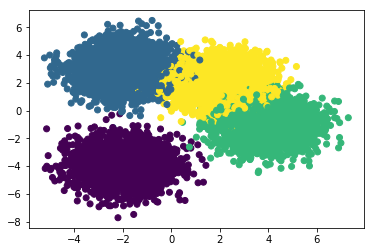

In [9]:
(X_train,X_test,y_train,y_test) = make_new_blobs([[-2,-4],[-2,3],[4,-1],[2,2]])

### 1.1 KMeans

In [10]:
km_labels = do_kmeans(X_train,4)

27.4 ms ± 644 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Estimated cluster centers:
[[-1.96163898 -3.9804452 ]
 [-1.94063827  3.04697528]
 [ 4.00999361 -1.02510308]
 [ 1.94669247  2.08094737]]
Number of estimated clusters: 4


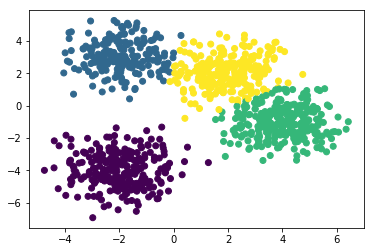

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      262    0    0    0
1        0  209    0    7
2        0    0  272    3
3        0    2   14  231


In [11]:
compare_clusters(X_train,km_labels)

### 1.2 Mean-shift

In [12]:
ms_labels = do_meanshift(X_train,4)

83.2 ms ± 763 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Estimated cluster centers:
[[ 3.92838185 -0.88998644]
 [ 2.00142268  1.82184807]
 [-1.91169847 -4.014875  ]
 [-1.8174768   3.01745004]]
Number of estimated clusters: 4


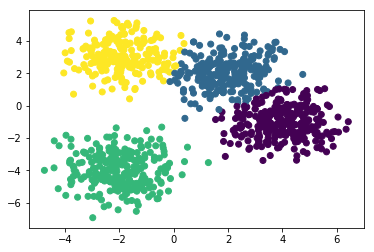

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0    0  262    0
1        0    5    0  211
2      272    3    0    0
3       13  230    0    4


In [13]:
compare_clusters(X_train,ms_labels)

### 1.3 Spectral Clustering

In [14]:
sc_labels = do_spectral(X_train,4)

826 ms ± 99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(Cluster centers not available as an attribute)
Number of estimated clusters: 4


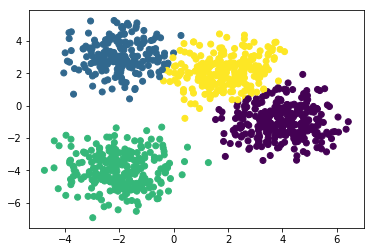

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0    0  262    0
1        0  206    0   10
2      273    0    0    2
3       21    1    0  225


In [15]:
compare_clusters(X_train,sc_labels)

### 1.4 Affinity Propagation

3.3 s ± 140 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Done
Estimated cluster centers:
[  8  21  27  56  65  68  71  91 101 125 134 145 148 152 174 192 216 249
 271 285 332 337 351 448 460 490 515 543 546 569 586 587 620 627 656 671
 672 722 736 744 758 764 766 786 798 808 810 831 835 846 861 874 890 929
 933 947 958 969 987 992 993]
Estimated number of clusters: 61


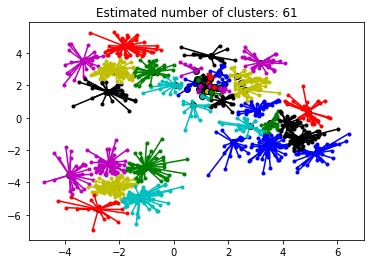

In [18]:
af_labels = do_affinity(X_train)

## 2. Let make_blobs choose its own 5 centers

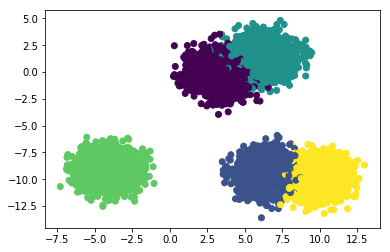

In [19]:
# Let make_blobs choose 5 blobs of its own
(X_train,X_test,y_train,y_test) = make_new_blobs(5)

### 2.1. KMeans

In [20]:
km_labels = do_kmeans(X_train,5)

30 ms ± 724 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Estimated cluster centers:
[[ 9.83698301 -9.80636503]
 [ 3.37615406 -0.23513839]
 [-4.03501097 -8.989707  ]
 [ 6.49597782 -9.24766475]
 [ 6.01836316  1.37190374]]
Number of estimated clusters: 5


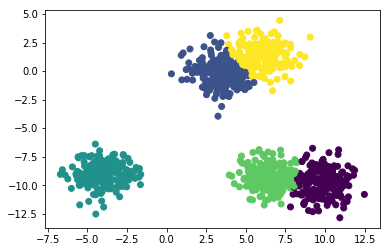

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0  184    0    0   17
1        3    0    0  188    0
2        0   11    0    0  190
3        0    0  209    0    0
4      188    0    0   10    0


In [21]:
compare_clusters(X_train,km_labels)

### 2.2 Mean-shift

In [22]:
ms_labels = do_meanshift(X_train,5)

131 ms ± 540 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Estimated cluster centers:
[[ 4.76167191  0.60085536]
 [ 7.84029801 -9.45219336]
 [-4.02630236 -8.94502108]]
Number of estimated clusters: 3


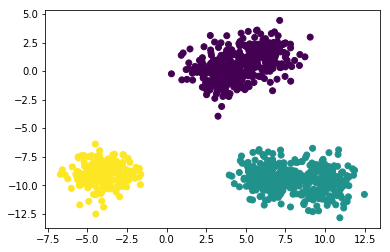

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      201    0    0
1        0  191    0
2      201    0    0
3        0    0  209
4        0  198    0


In [23]:
compare_clusters(X_train,ms_labels)

### 2.3 Spectral Clustering

In [24]:
sc_labels = do_spectral(X_train,5)

944 ms ± 39.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(Cluster centers not available as an attribute)
Number of estimated clusters: 5


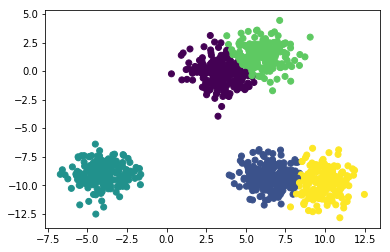

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0      184    0    0   17    0
1        0  190    0    0    1
2       12    0    0  189    0
3        0    0  209    0    0
4        0   16    0    0  182


In [25]:
compare_clusters(X_train,sc_labels)

### 2.4 Affinity Propagation

2.88 s ± 27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Done
Estimated cluster centers:
[ 30  65  75 227 458 560 657 685 688 753 873 874 955]
Estimated number of clusters: 13


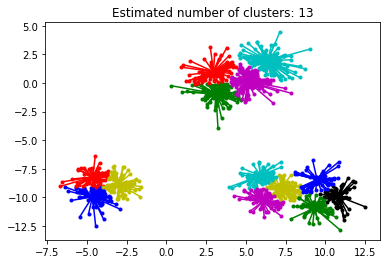

In [26]:
af_labels = do_affinity(X_train)

## 3. Let make_blobs choose its own 7 clusters

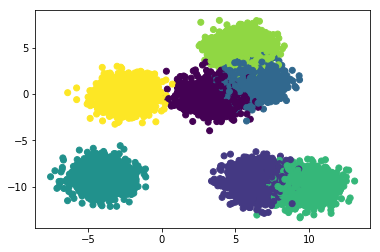

In [27]:
(X_train,X_test,y_train,y_test) = make_new_blobs(7)

### 3.1 KMeans

In [28]:
km_labels = do_kmeans(X_train,7)

40.5 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Estimated cluster centers:
[[ 3.55738673 -0.27053917]
 [ 6.44770542 -9.38936434]
 [-3.9397753  -9.02773637]
 [-2.46599891 -0.15744924]
 [ 5.28216593  5.06041219]
 [ 9.70154734 -9.98880468]
 [ 6.30396093  1.47862217]]
Number of estimated clusters: 7


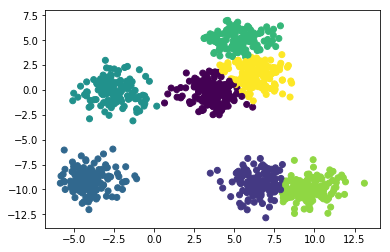

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5    6
row_0                                   
0      140    0    0    0    0    0   11
1        0  130    0    0    0   12    0
2       13    0    0    0    2    0  136
3        0    0  142    0    0    0    0
4        0    7    0    0    0  126    0
5        0    0    0    0  137    0    6
6        0    0    0  138    0    0    0


In [29]:
compare_clusters(X_train,km_labels)

### 3.2 Mean-shift

In [30]:
ms_labels = do_meanshift(X_train,7)

54.3 ms ± 639 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Estimated cluster centers:
[[ 5.06835541  1.94879393]
 [ 8.07889112 -9.69618554]
 [-2.23089202 -0.1693744 ]
 [-3.9397753  -9.02773637]]
Number of estimated clusters: 4


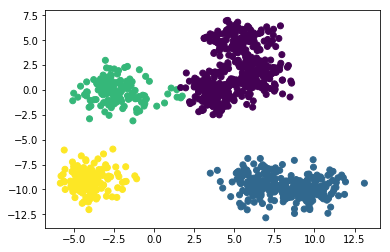

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      144    0    7    0
1        0  142    0    0
2      151    0    0    0
3        0    0    0  142
4        0  133    0    0
5      143    0    0    0
6        0    0  138    0


In [31]:
compare_clusters(X_train,ms_labels)

### 3.3 Spectral Clustering

In [32]:
sc_labels = do_spectral(X_train,7)

980 ms ± 47.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(Cluster centers not available as an attribute)
Number of estimated clusters: 7


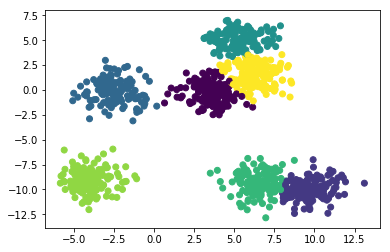

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5    6
row_0                                   
0      140    0    0    0    0    0   11
1        0   10    0    0  132    0    0
2       10    0    0    2    0    0  139
3        0    0    0    0    0  142    0
4        0  126    0    0    7    0    0
5        0    0    0  135    0    0    8
6        0    0  138    0    0    0    0


In [33]:
compare_clusters(X_train,sc_labels)

### 3.4 Affinity Propagation

2.23 s ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Done
Estimated cluster centers:
[ 42  51 139 150 205 296 358 481 509 513 591 650 740 749 773 894]
Estimated number of clusters: 16


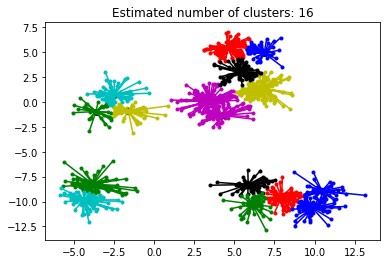

In [34]:
af_labels = do_affinity(X_train)

# Summary

### In terms of speed, they rank in the order in which they were run (KMeans, Mean-shifting, Spectral clustering, Affinity Propagation).
KMeans is consistently the fastest of the bunch, and had a more or less linear increase in runtime when it had more blobs to consider. It was fairly accurate at finding and correctly clustering observations from the blobs that were generated.

Mean-shifting was second-fastest, and I noticed that its speed was not entirely dependent on the number of clusters, or even the number of clusters it thought there were. I'm going to guess that its speed is dependent on how "bumpy" the data seems as it feels its way to the peaks of the distribution. The longest run was the five-blob run, where two pairs of blobs were smashed together. 

Mean-shifting had a problem finding all of the defined blobs--it happily clustered blobs together if their observations were right up against each other, finding fewer clusters than there should have been. I think it's for this reason that the seven-blob run was the fastest of the bunch here--it grouped a few blobs together and only ended up with four clusters.

Spectral clustering was noticeably slower, but fairly accurate. Its behavior seemed to increase with the number of blobs, like KMeans did.

Affinity propagation was consistently the slowest performer, but its speed did was not entirely dependent on the number of clusters. The first run with only four blobs was actually the worst, because it found a way to divide those four blobs into 61 clusters! Oddly though, the timing for five blobs (13 clusters found) was slower than for seven blobs (16 clusters). I'm not sure what to make of that...?

<img src="cluster performance.png">